### Linear Regression

In [15]:
# Align Outputs to center
from IPython.display import display, HTML
display(HTML("""
<style>
.output {
    display: table-cell;
    align-items: center;
    text-align: center;
}
</style>
"""))

## Loading Libraries
# data manipulation
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np

# data modeling
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


## Loading data
# read data into a DataFrame
ads = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
ads.head()


,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [16]:
## "Some of the figures in this presentation are taken from 
## "An Introduction to Statistical Learning, with applications in R"
## (Springer, 2013) with permission from the authors: 
## G. James, D. Witten,  T. Hastie and R. Tibshirani "

#### What are we trying to predict? --> Target (y)
 - Sales: Number of items sold (in thousands)

#### What affects are Target value? --> Factors (x)
 - TV: Dollar amount spent adverstizing on TV
 - Radio: Dollar amount spent adverstizing on Radio
 - Newspaper: Dollar amount spent adverstizing on Newspaper
 
#### Which of these factors contribute in predicting the Target?
Lets plot & find out

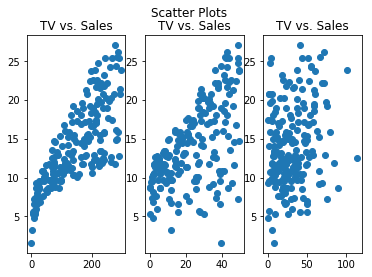

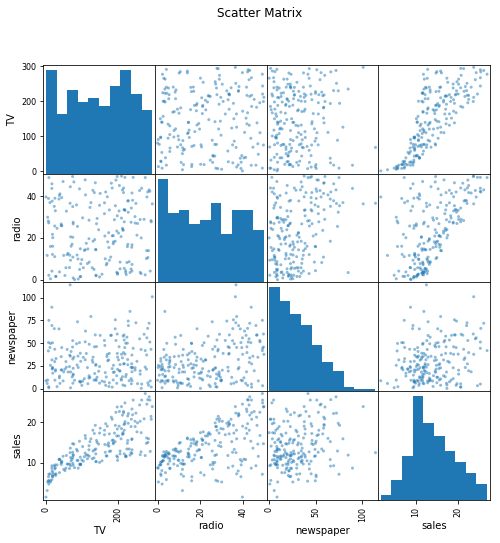

In [17]:
## Analyze
fig_1 = plt.figure(1)
fig_1.suptitle("Scatter Plots")
sub_1_1 = plt.subplot(131)
sub_1_1.set_title("TV vs. Sales")
plt.scatter(ads.TV, ads.sales)
sub_1_2 = plt.subplot(132)
sub_1_2.set_title("TV vs. Sales")
plt.scatter(ads.radio, ads.sales)
sub_1_3 = plt.subplot(133)
sub_1_3.set_title("TV vs. Sales")
plt.rcParams["figure.figsize"] = (18,4)
plt.scatter(ads.newspaper, ads.sales)
plt.show()

pd.plotting.scatter_matrix(ads, figsize=(8, 8));
#plt.rcParams["figure.figsize"] = fig_size
plt.suptitle("Scatter Matrix");

#### What do we see?

In [18]:
# Correlation matrix

In [19]:
## Transform


# Training & Testing Set

#print('Length of Train Set: ', len(y_train))
#print('Length of Test Set: ', len(y_test))
## IF classification we also need equal class
## IF qualitative then need to convert to factors

In [20]:
## Linear Regression from sklearn


# print the coefficients
# print (linear.intercept_)
# print (linear.coef_)

# Predict using model


Let us look at the math:
<center>$y = \beta_0 + \beta_1x$, where</center>
<center>$y$ is the target</center>
<center>$\beta_0$ is the intercept and</center>
<center>$\beta_1$ is the weight of the factor 'TV'</center>

By running the linear regression algorithm we are trying to find the weight & intercept that minimizes the least square error.

With Sales as the target & TV as the predictor we have:
<center>sales $=$ 7.1174 $+$ 0.0469 * TV</center>

Is this model 'good enough'?

In [21]:
# Evaluation

#print('Error of the uni-variate linear regression is ', err, '%')

## There are other ways such as R-squared to test linear models

Is this the best we can do?
Is Sales just based on TV ads?

In [22]:
# We can try including more parameters

#print('Error of the multi-variate linear regression is ', err, '%')

The error reduced by 5% when we added 2 extra factors. Is the cost of adding 2 factors worth the 5% decrease in accuracy?

#### Summary
Linear Regression is a simple & powerful modeling technique that covers a lot of prediction cases. But, it does not cover non-linear cases covered by models such as Support Vector Regression & Neural Networks.
Often times linear regression is used to estimate the trend  & evaluate the effect of a chosen factor, but not necessarily to predict the target by itself.

-------
### Logistic Regression

In [23]:
# create a column of categorical variable
ads.salesQ = ['Greater' if val > 12.0 else 'Less than' for val in ads.sales]

# Transform


# Model


# print the coefficients
#print (logistic.intercept_)
#print (logistic.coef_)

Let us look at the math:
<center>$log(p/1-p) = \beta_0 + \beta_1x$, where</center>
<center>$p$ is the likelihood of the target being true given all other outcomes</center>
<center>$\beta_0$ is the intercept and</center>
<center>$\beta_1$ is the weight of the factor 'TV'</center>

Also written as:
### <center>$p = \frac {e^{\beta_0 + \beta_1x}} {1 + e^{\beta_0 + \beta_1x}}$</center>

By running the logistic regresssion algorithm we are trying to find the weight & intercept that minimizes the least square error (L2 norm).

With Sales as the target & TV as the predictor we have:
### <center>$ p_{sales} = \frac {e^{ 2.6684 - 0.0227*x_{TV}}} {1 + e^{ 2.6684 - 0.0227*x_{TV}}} $</center>

With Sales as the target & TV, Newspaper & Radio as the predictors we have:
### <center>$ p_{sales} = \frac {e^{ 4.5277 - 0.0246*x_{TV} + 0.0033*x_{newspaper} - 0.0829*x_{radio}}} {1 + e^{4.5277 - 0.0246*x_{TV} + 0.0033*x_{newspaper} - 0.0829*x_{radio}}} $</center>

Is this model 'good enough'?

In [24]:
# Evaluate

#print('Accuracy of the binomial logistic regression is ', acc, '%')

#print(confusion_matrix)

# Formating the confusion matrix
#labels = ['Greater', 'Less Than']
#fig = plt.figure()
#ax = fig.add_subplot(111)
#cax = ax.matshow(confusion_matrix)
#plt.title('Confusion matrix of the classifier')
#fig.colorbar(cax)
#ax.set_xticklabels([''] + labels)
#ax.set_yticklabels([''] + labels)
#plt.xlabel('Predicted')
#plt.ylabel('True')
#plt.show()

# plot the class predictions if we only used 1 feature
#ads_test = {'TV': x_test.TV, 'newspaper': x_test.newspaper, 'radio': x_test.radio, 'salesQ': y_test}
#ads_test = {'TV': x_test.TV, 'salesQ': y_test}
#ads_test = pd.DataFrame(ads_test)
#ads_test['salesQ_pred'] = y_pred
#ads_test.sort_values('TV', inplace=True)
#plt.rcParams["figure.figsize"] = (6,4)
#plt.scatter(ads_test.TV, ads_test.salesQ)
#plt.plot(ads_test.TV, ads_test.salesQ_pred, color='red')
#plt.show()

While the above is true, can we get a more wholistic picture of the results?

In [25]:
# Likelihood of the prediction being true given other outcomes

#ads_test['salesQ_pred_prob'] = sorted(y_pred_prob[:,0])
#plt.rcParams["figure.figsize"] = (6,4)
#plt.scatter(ads_test.TV, ads_test.salesQ)
#plt.plot(ads_test.TV, ads_test.salesQ_pred_prob, color='red')
#plt.show()

#### Summary
Logistic regression results in a curve that respresents the likelihood of factors resulting in a class/label. Logistic regression is widely used for binomial classification and is even used as the last layer of many Neural Networks.

-----